In [1]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore',category=FutureWarning)

In [2]:
df = pd.read_csv("news.csv")
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [3]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [4]:
new_df = df.drop('Unnamed: 0',axis='columns')

In [5]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6335 non-null   object
 1   text    6335 non-null   object
 2   label   6335 non-null   object
dtypes: object(3)
memory usage: 148.6+ KB


In [36]:
new_df['label'].unique()

array(['FAKE', 'REAL'], dtype=object)

In [37]:
new_df['label'] = new_df['label'].replace({'FAKE':0,'REAL':1})

In [6]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6335 non-null   object
 1   text    6335 non-null   object
 2   label   6335 non-null   object
dtypes: object(3)
memory usage: 148.6+ KB


In [7]:
new_df['content'] = new_df['title']+' '+new_df['text']
new_df.drop(['title','text'],axis='columns',inplace=True)
new_df

,label,content
0,FAKE,You Can Smell Hillary’s Fear Daniel Greenfield...
1,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...
2,REAL,Kerry to go to Paris in gesture of sympathy U....
3,FAKE,Bernie supporters on Twitter erupt in anger ag...
4,REAL,The Battle of New York: Why This Primary Matte...
...,...,...
6330,REAL,State Department says it can't find emails fro...
6331,FAKE,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332,FAKE,Anti-Trump Protesters Are Tools of the Oligarc...
6333,REAL,"In Ethiopia, Obama seeks progress on peace, se..."


In [8]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.pipeline import Pipeline

In [9]:
model = Pipeline([
    ('cv',CountVectorizer()),
    ('transform',TfidfTransformer()),
    ('svm', SVC())
])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
from sklearn.model_selection import train_test_split

x=new_df['content']
y=new_df['label']

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
print(f'x_train shape: {x_train.shape}, y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}, y_test shape: {y_test.shape}')

x_train shape: (5068,), y_train shape: (5068,)
x_test shape: (1267,), y_test shape: (1267,)


In [16]:
model.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('transform', TfidfTransformer()),
                ('svm', SVC())])

In [17]:
model.score(x_test,y_test)

0.9297553275453828

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [19]:
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)

In [20]:
print(f"Accuracy: {accuracy_score(y_test,y_pred)}\nClassification report: {classification_report(y_test,y_pred)}")

Accuracy: 0.9297553275453828
Classification report:               precision    recall  f1-score   support

        FAKE       0.91      0.95      0.93       628
        REAL       0.95      0.91      0.93       639

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



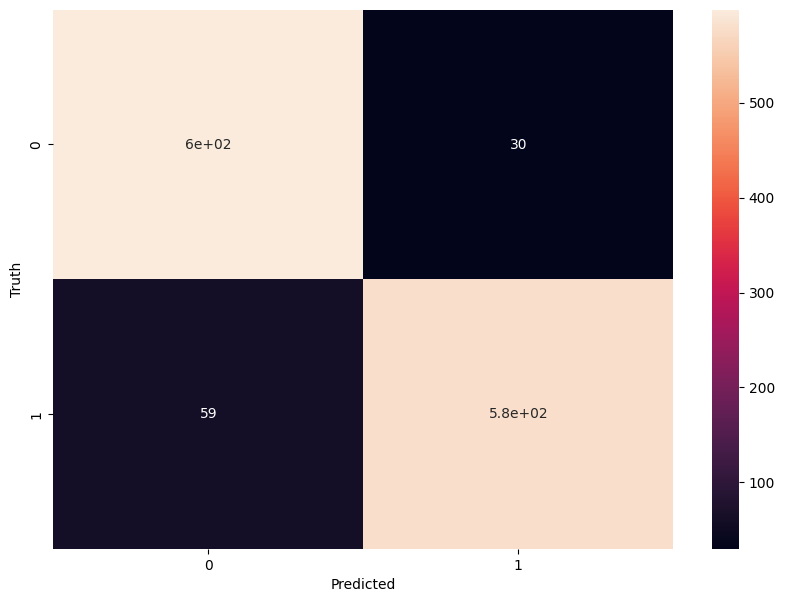

In [22]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
